# Final project


You are a team of data scientists and ML engineers working for a recipe website.

Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.


Your team's job is to build a model that calssifies whether a nutirtional content is either of the below three catgories
- Criteria for **"Nourishing"**: High in protein and/or fiber, low in saturated fat and sugar, not excessively high in calories.
- Criteria for **"Indulgent"**: High in sugars or saturated fats, very low in beneficial nutrients like protein and fiber, or very high in calories.
- **"Balanced"** is for foods that fall between "Nourishing" and "Indulgent".


# Data

You are provided train and test datasets with the target value as **"Health Category"**

This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values ​​are based on a 100g serving. Here is a description of the columns:

- **FDC_ID** : A unique identifier for each food item in the database.
- **Item** : The name or description of the food product.
- **Category** : The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories** : The energy content of the food, presented in kilocalories (kcal).
- **Protein** : The protein content of the food, measured in grams.
- **Carbohydrate** : The carbohydrate content of the food, measured in grams.
- **Total fat** : The total fat content of the food, measured in grams.
- **Cholesterol** : The cholesterol content of the food, measured in milligrams.
- **Fiber** : The dietary fiber content of the food, measured in grams.
- **Water** : The water content of the food, measured in grams.
- **Alcohol** : The alcohol content of the food (if any), measured in grams.
- **Vitamin C** : The Vitamin C content of the food, measured in milligrams.
- **Health Category** : Categorizing the nutitonal contents  


# Project Delivarables
 1. Investigate and experiment with different classification models using the training data. This involves assessing various algorithms to determine the most suitable option based on our dataset's characteristics. (Save the model weights)
 2. Emphasize a thorough exploration and understanding of the dataset. 
 3. EDA
 4. Provide a detailed explanation of the strategies implemented to address issues related to missing values and imbalanced datasets.
 5. Feature Engineering
 6. A function to test your model at the end of your jupyter notebook

 

## Evaluation 
1. Each team is required to save the predictions from their best model on the test data and submit a CSV file containing a single column of predictions, labeled "predictions". This file should reflect the outcomes generated by your most effective model.
2. I will evaluate your predictions against the actual test set to determine the f1 validation scores. The f1 validation score, a measure of a model's accuracy, balances precision validation validation validation and recall validation, providing a comprehensive assessment of performance.
3. The team whose model performs better wins. Each member of the winning team gets to drop their lowest homework grade.

# Submission:
- The notebook must contain the `predict()` function.
- Each team should submit the following
    - Model pickel file
    - Single Jupyter Notebook in HTML and ipynb format
    - Complete Report in PDF
    - Presentation deck 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_curve,precision_score,recall_score,roc_auc_score
from yellowbrick.classifier import ROCAUC,ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_df.csv")
df.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0 mg,11.3,9.31 g,0.0 g,12.0 mg,Indulgent
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0 mg,0.0,62.64 g,0.0 g,0.0 mg,Indulgent
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0 mg,0.7,88.52 g,0.0 g,5.8 mg,Indulgent
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0 mg,0.0,67.93 g,0.0 g,0.0 mg,Balanced
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0 mg,1.0,89.1 g,NaN,61.0 mg,Indulgent


In [3]:
df.shape

(1558, 13)

In [4]:
df.describe()

,FDC_ID,Calories,Protein,Carbohydrate,Total fat,Fiber
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1448.000000
mean,171395.051990,220.541720,11.953806,19.226341,10.912991,2.023135
std,2215.343862,170.851821,10.778995,25.274504,16.602603,4.263749
min,167515.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169531.250000,88.250000,2.182500,0.000000,0.800000,0.000000
50%,171382.500000,179.000000,9.055000,7.600000,5.100000,0.200000
75%,173350.500000,319.000000,20.495000,26.570000,13.972500,2.200000
max,175293.000000,900.000000,88.320000,99.100000,100.000000,44.500000


In [5]:
df.describe(include=object)

,Item,Category,Cholesterol,Water,Alcohol,Vitamin C,Health Category
count,1558,1558,1490,1558,1091,1480,1558
unique,1558,25,170,1294,13,255,3
top,"Spices, poultry seasoning",Beef Products,0.0 mg,0.0 g,0.0 g,0.0 mg,Indulgent
freq,1,188,640,14,1076,743,756


In [6]:
cols = ['Cholesterol','Water','Alcohol','Vitamin C']
for i in cols:
    l=[]
    for j in range(len(df)):
        if type(df[i].iloc[j]) != type(0.0):
            l += [float(df[i].iloc[j].split(' ')[0])]
        else:
            l += [df[i].iloc[j]]
    df[i]=l

In [7]:
df.dtypes

FDC_ID               int64
Item                object
Category            object
Calories           float64
Protein            float64
Carbohydrate       float64
Total fat          float64
Cholesterol        float64
Fiber              float64
Water              float64
Alcohol            float64
Vitamin C          float64
Health Category     object
dtype: object

In [8]:
df.describe()

,FDC_ID,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1490.000000,1448.000000,1558.000000,1091.000000,1480.000000
mean,171395.051990,220.541720,11.953806,19.226341,10.912991,43.011409,2.023135,56.042908,0.121357,9.166959
std,2215.343862,170.851821,10.778995,25.274504,16.602603,113.204632,4.263749,29.685042,1.228915,76.165746
min,167515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169531.250000,88.250000,2.182500,0.000000,0.800000,0.000000,0.000000,38.000000,0.000000,0.000000
50%,171382.500000,179.000000,9.055000,7.600000,5.100000,7.000000,0.200000,64.590000,0.000000,0.000000
75%,173350.500000,319.000000,20.495000,26.570000,13.972500,69.000000,2.200000,78.300000,0.000000,3.500000
max,175293.000000,900.000000,88.320000,99.100000,100.000000,2195.000000,44.500000,100.000000,23.100000,2732.000000


In [9]:
total=df.isnull().sum().sort_values(ascending=False) # Total Number of Null Values
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) # Calculating the percentage of missing values
missed=pd.concat([total,percent],axis=1,keys=['total','percent'])
missed

,total,percent
Alcohol,467,29.974326
Fiber,110,7.060334
Vitamin C,78,5.006418
Cholesterol,68,4.364570
FDC_ID,0,0.000000
Item,0,0.000000
Category,0,0.000000
Calories,0,0.000000
Protein,0,0.000000
Carbohydrate,0,0.000000


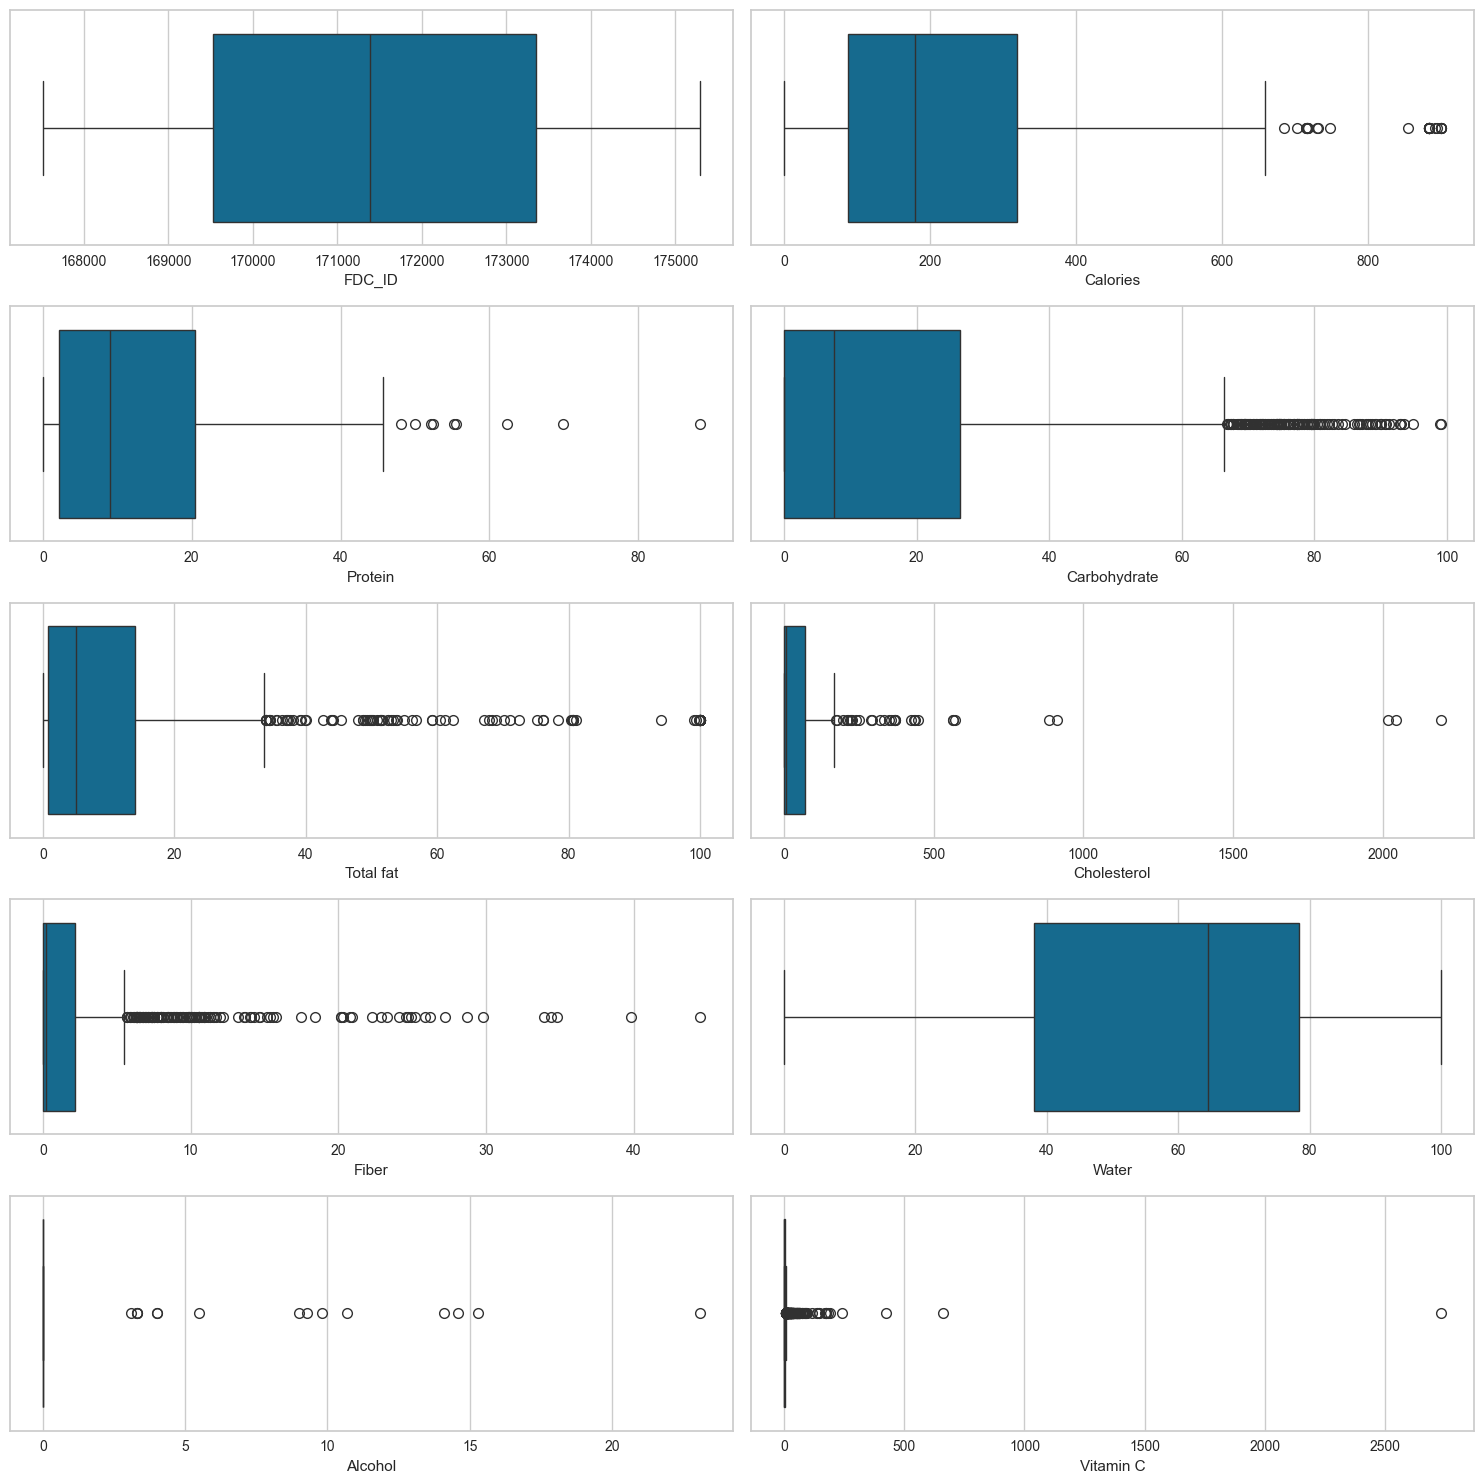

In [10]:
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=[15,15])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sns.boxplot(x=df[i],ax=j)
    plt.tight_layout()
    # fig.autofmt_xdate()

plt.show()

In [11]:
cols = ['Alcohol','Fiber','Vitamin C','Cholesterol']
for i in cols:
    df[i].fillna(df[i].median(),inplace=True)
# cols = ['Alcohol','Fiber','Vitamin C','Cholesterol']
# for i in cols:
#     df[i].fillna(0,inplace=True)
# imputer = IterativeImputer(max_iter=10,initial_strategy='median', random_state=0)
# df[cols] = imputer.fit_transform(df[cols])

In [12]:
def outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low_lim=q1-(1.5*iqr)
    up_lim=q3+(1.5*iqr)
    
    for x in df[col]:
        if x>up_lim:
            df[col]=df[col].replace(to_replace=x,value=up_lim)
        elif x<low_lim:
            df[col]=df[col].replace(to_replace=x,value=low_lim)

In [13]:
num = df.select_dtypes(include=np.number)
for i in num.columns:
    if i!= 'Alcohol':
        outliers(df,i)

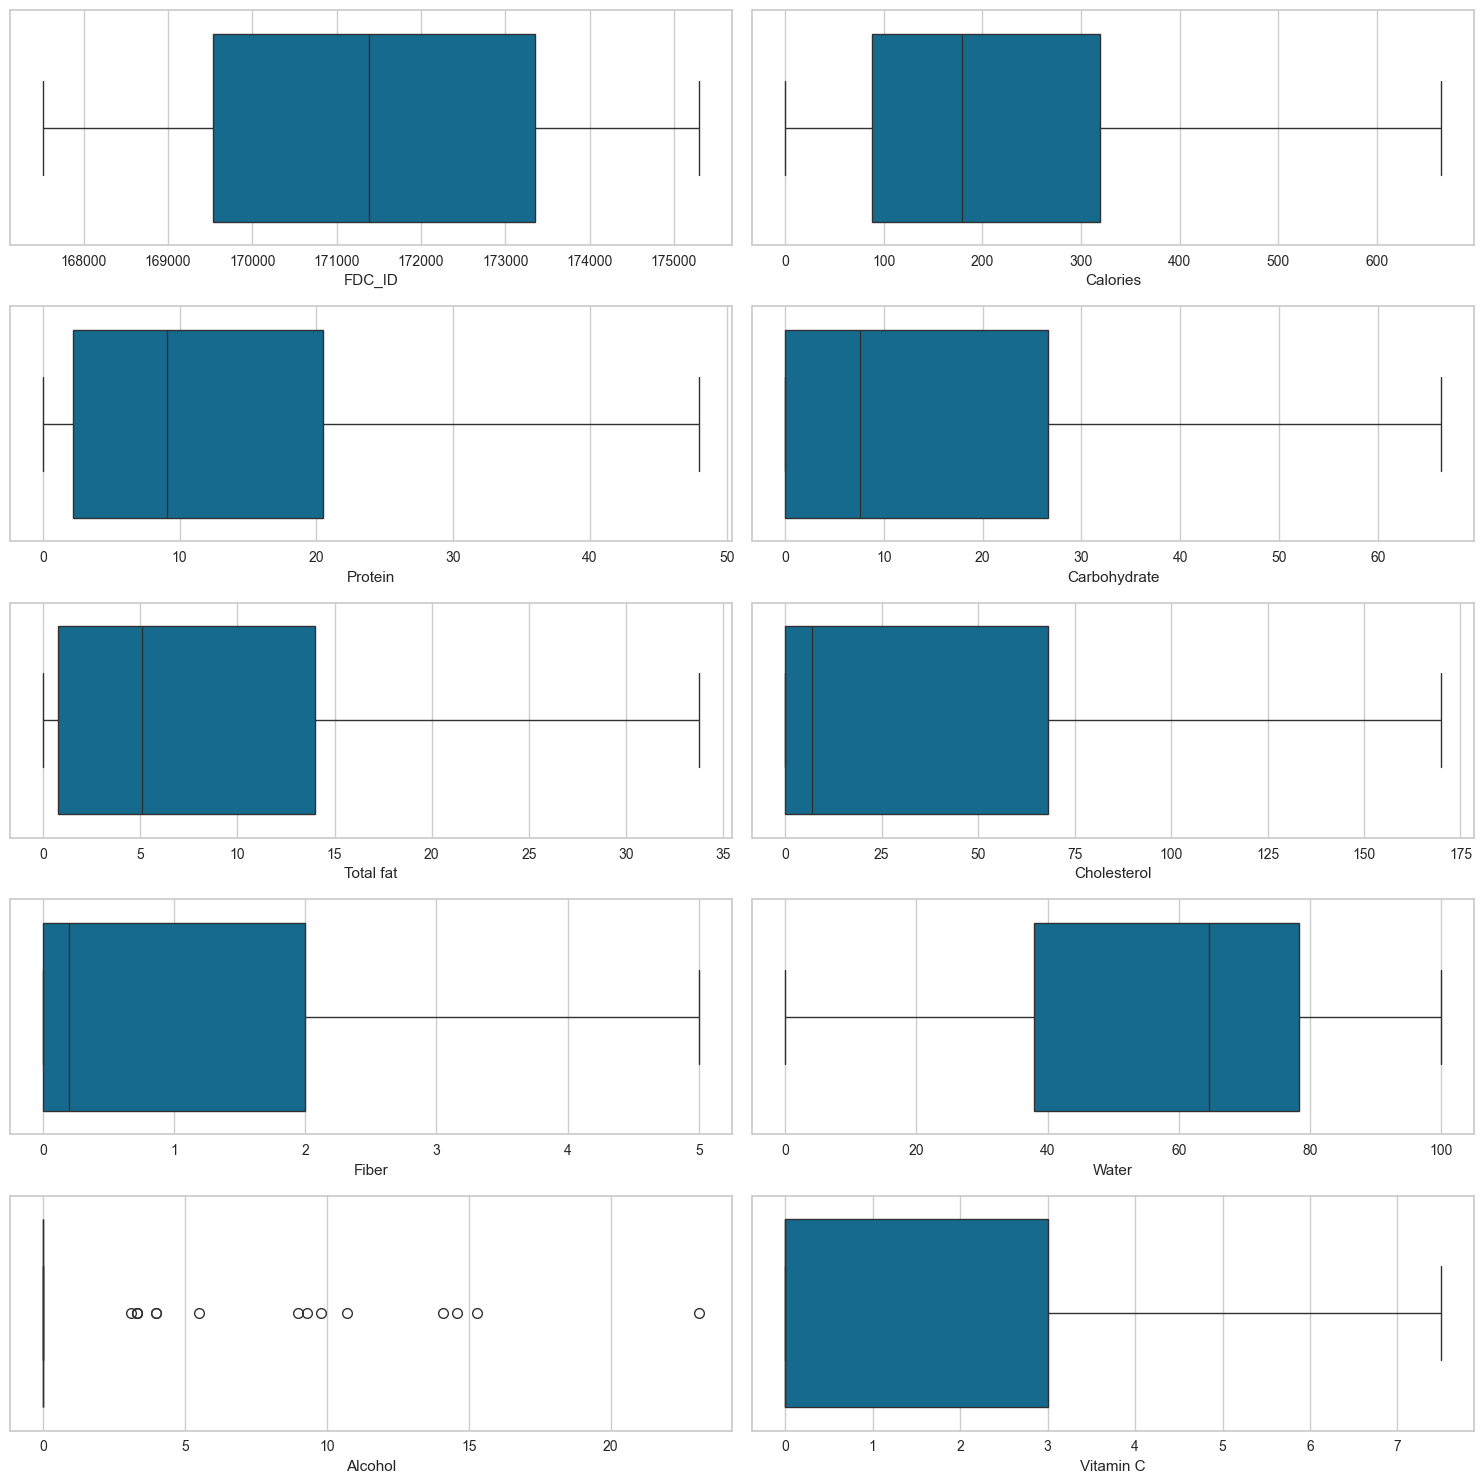

In [14]:
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=[15,15])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sns.boxplot(x=df[i],ax=j)
    plt.tight_layout()
    # fig.autofmt_xdate()

plt.show()

In [15]:
# cols = ['Alcohol','Fiber','Vitamin C','Cholesterol']
# for i in cols:
#     df[i].fillna(value=0.0,inplace = True)

In [16]:
total=df.isnull().sum().sort_values(ascending=False) # Total Number of Null Values
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) # Calculating the percentage of missing values
missed=pd.concat([total,percent],axis=1,keys=['total','percent'])
missed

,total,percent
FDC_ID,0,0.0
Item,0,0.0
Category,0,0.0
Calories,0,0.0
Protein,0,0.0
Carbohydrate,0,0.0
Total fat,0,0.0
Cholesterol,0,0.0
Fiber,0,0.0
Water,0,0.0


In [17]:
num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(include = 'object')
len(num.columns),len(cat.columns)

(10, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

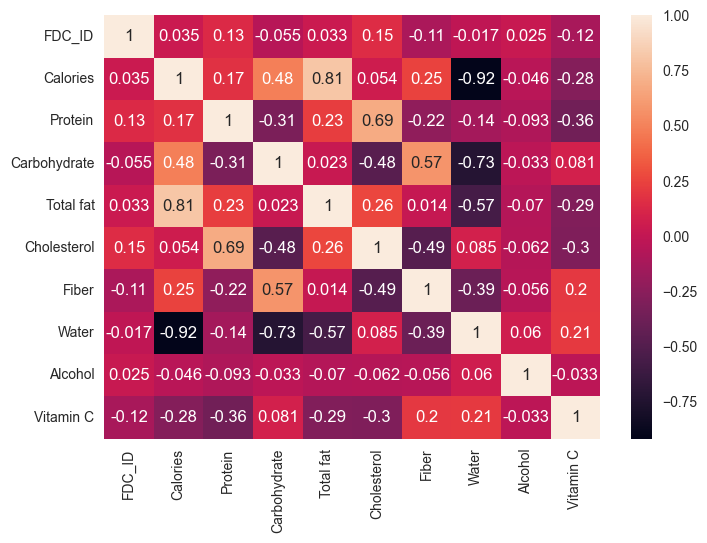

In [18]:
sns.heatmap(num.corr(),annot = True)
plt.show

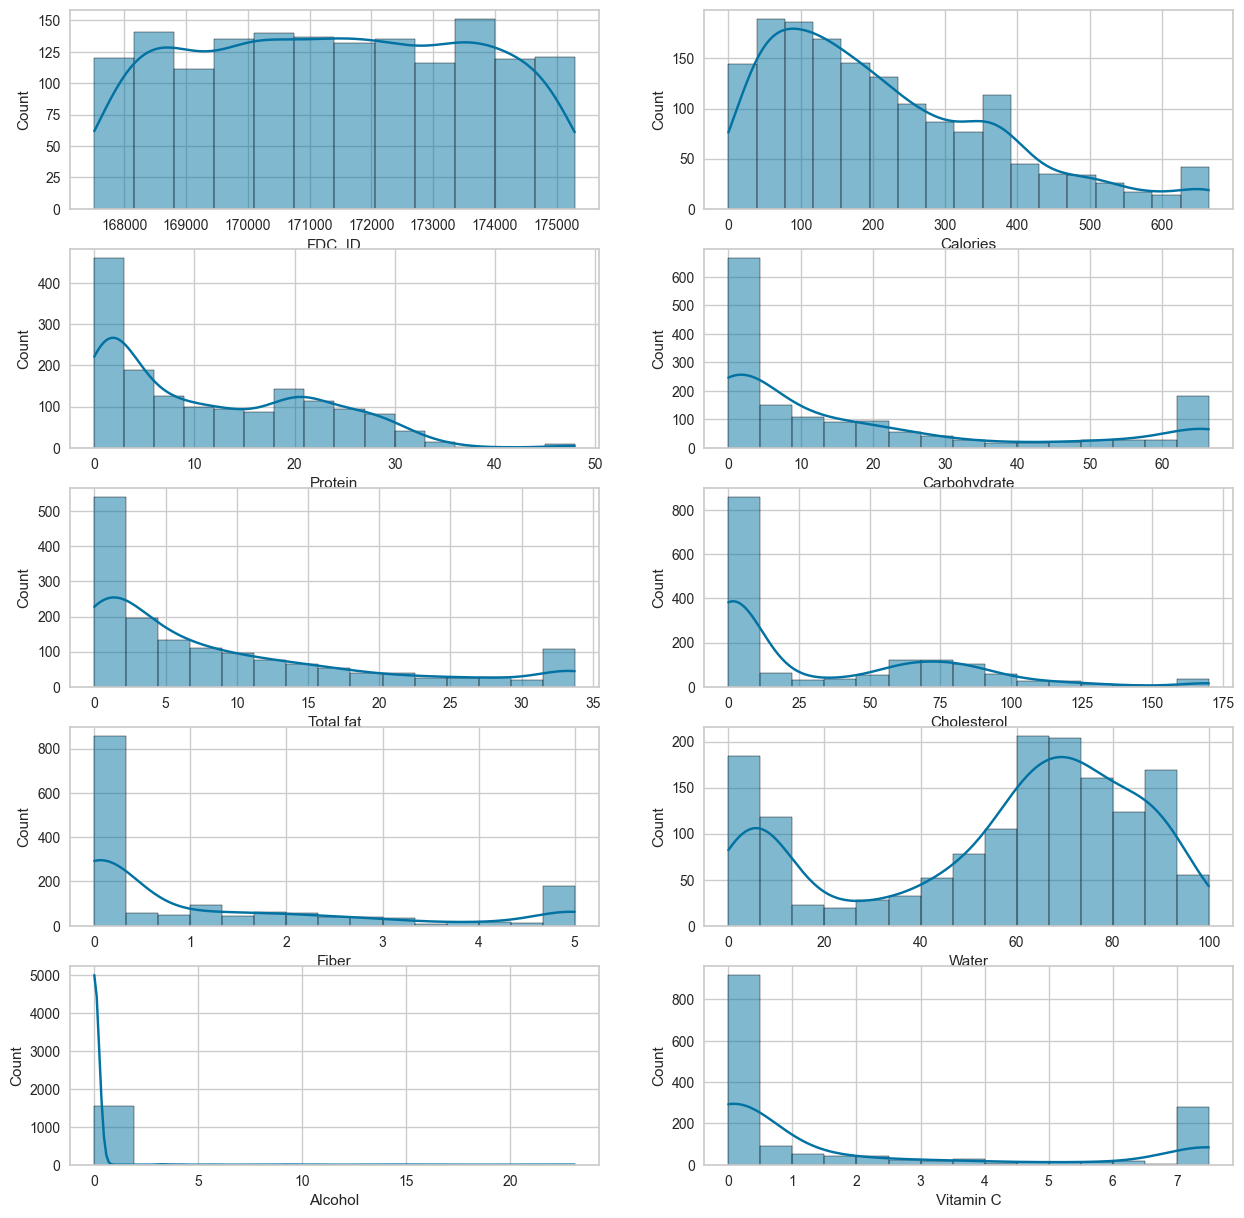

In [19]:
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=[15,15])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sns.histplot(x=df[i],ax=j,kde = True)
plt.show()

In [20]:
num.skew()
# all are skewed so min max scalar can be used  

FDC_ID           0.001764
Calories         0.904673
Protein          0.642002
Carbohydrate     1.153826
Total fat        1.191444
Cholesterol      1.131436
Fiber            1.234249
Water           -0.679180
Alcohol         15.038220
Vitamin C        1.199467
dtype: float64

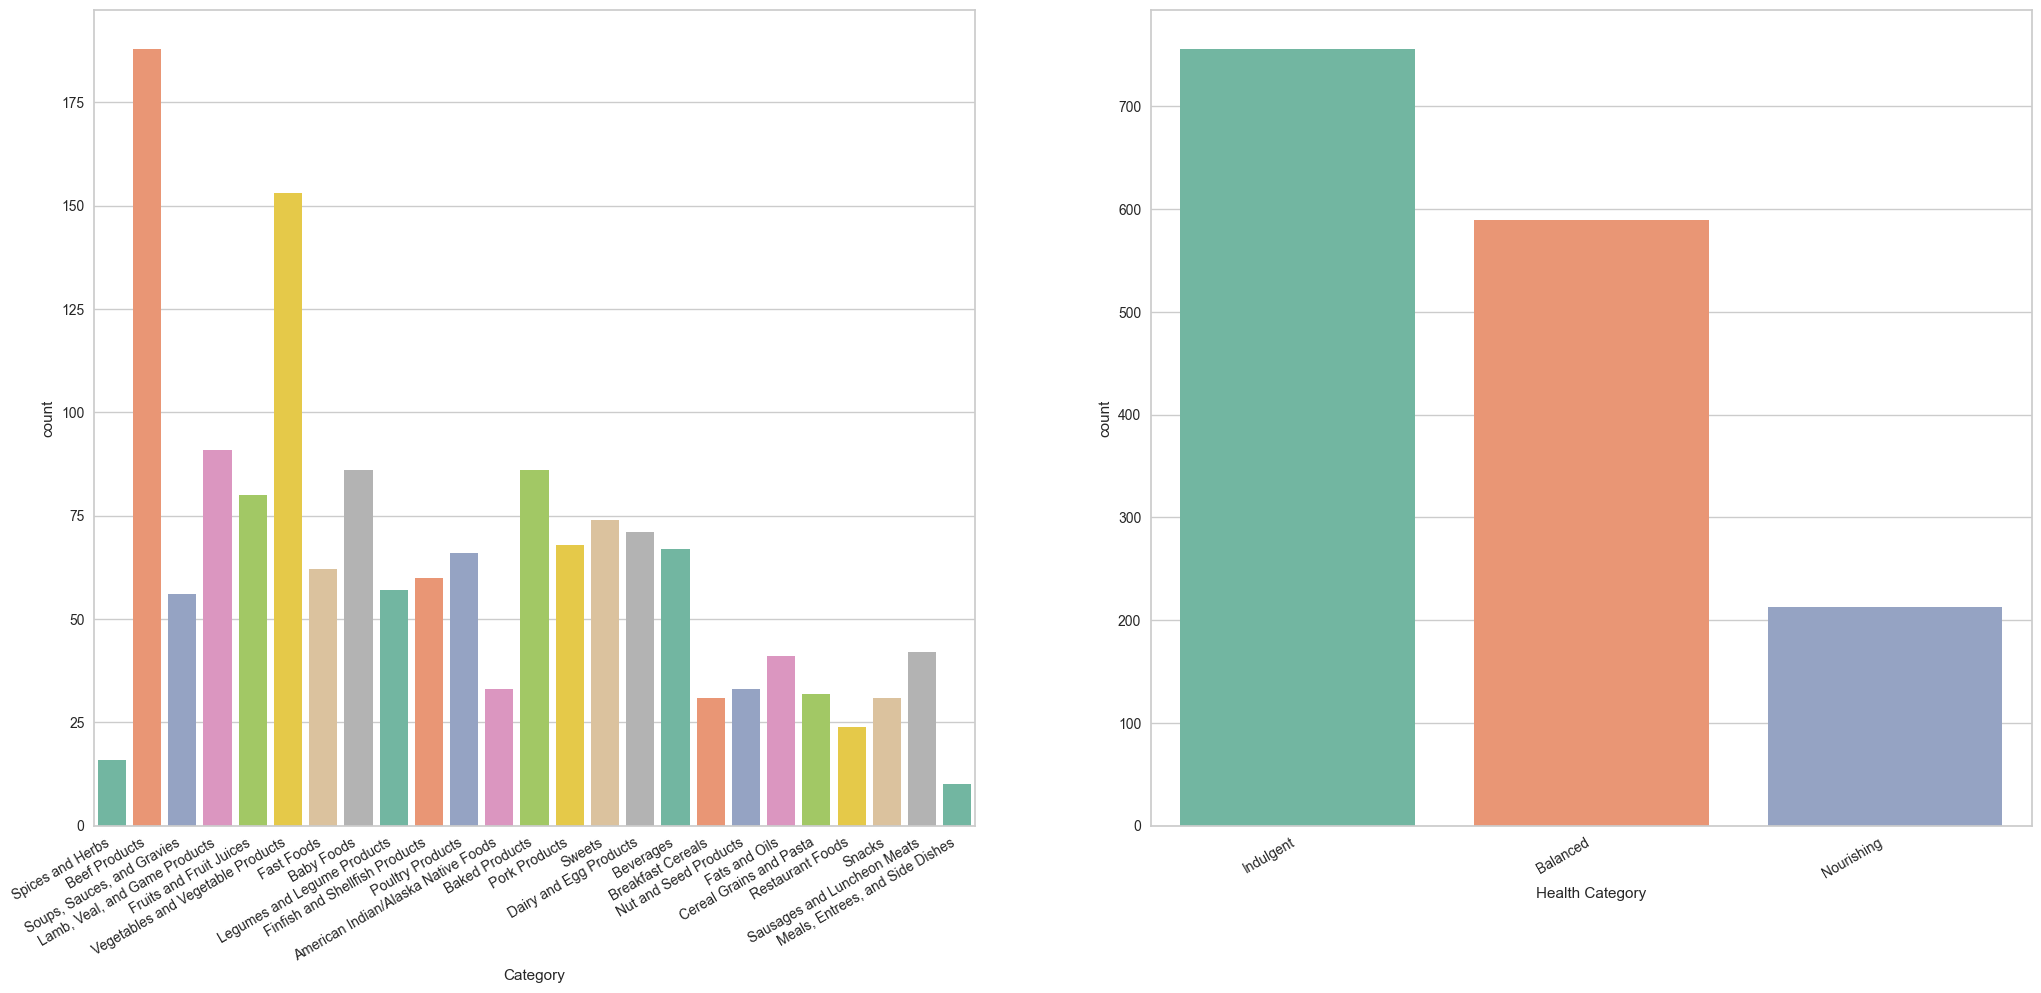

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=[25,12])
cols = ['Category','Health Category']
for i,j in zip(cols,ax.flatten()):
    if i!= 'Item':
        sns.countplot(data=df,x=df[i],hue=i,ax=j,palette='Set2')
        # plt.tight_layout()
fig.autofmt_xdate()
plt.show()

In [22]:
df['Health Category'].value_counts()

Health Category
Indulgent     756
Balanced      589
Nourishing    213
Name: count, dtype: int64

In [23]:
# le = LabelEncoder()
categories = ['Indulgent', 'Balanced', 'Nourishing']
oe1 = OrdinalEncoder(categories=[categories])
oe2 = OrdinalEncoder(categories=[df.Category.unique()])
df[['Health Category']] = oe1.fit_transform(df[['Health Category']]).astype(int)
df[['Category']] = oe2.fit_transform(df[['Category']]).astype(int)


In [24]:
df.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category
0,171331,"Spices, poultry seasoning",0,307.0,9.59,65.59,7.53,0.0,5.0,9.31,0.0,7.5,0
1,172162,"Beef, plate steak, boneless, outside skirt, se...",1,238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,0.0,0
2,172920,"Soup, tomato rice, canned, prepared with equal...",2,47.0,0.82,8.54,1.06,1.0,0.7,88.52,0.0,5.8,0
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...",3,187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,0.0,1
4,167754,"Pummelo, raw",4,38.0,0.76,9.62,0.04,0.0,1.0,89.10,0.0,7.5,0


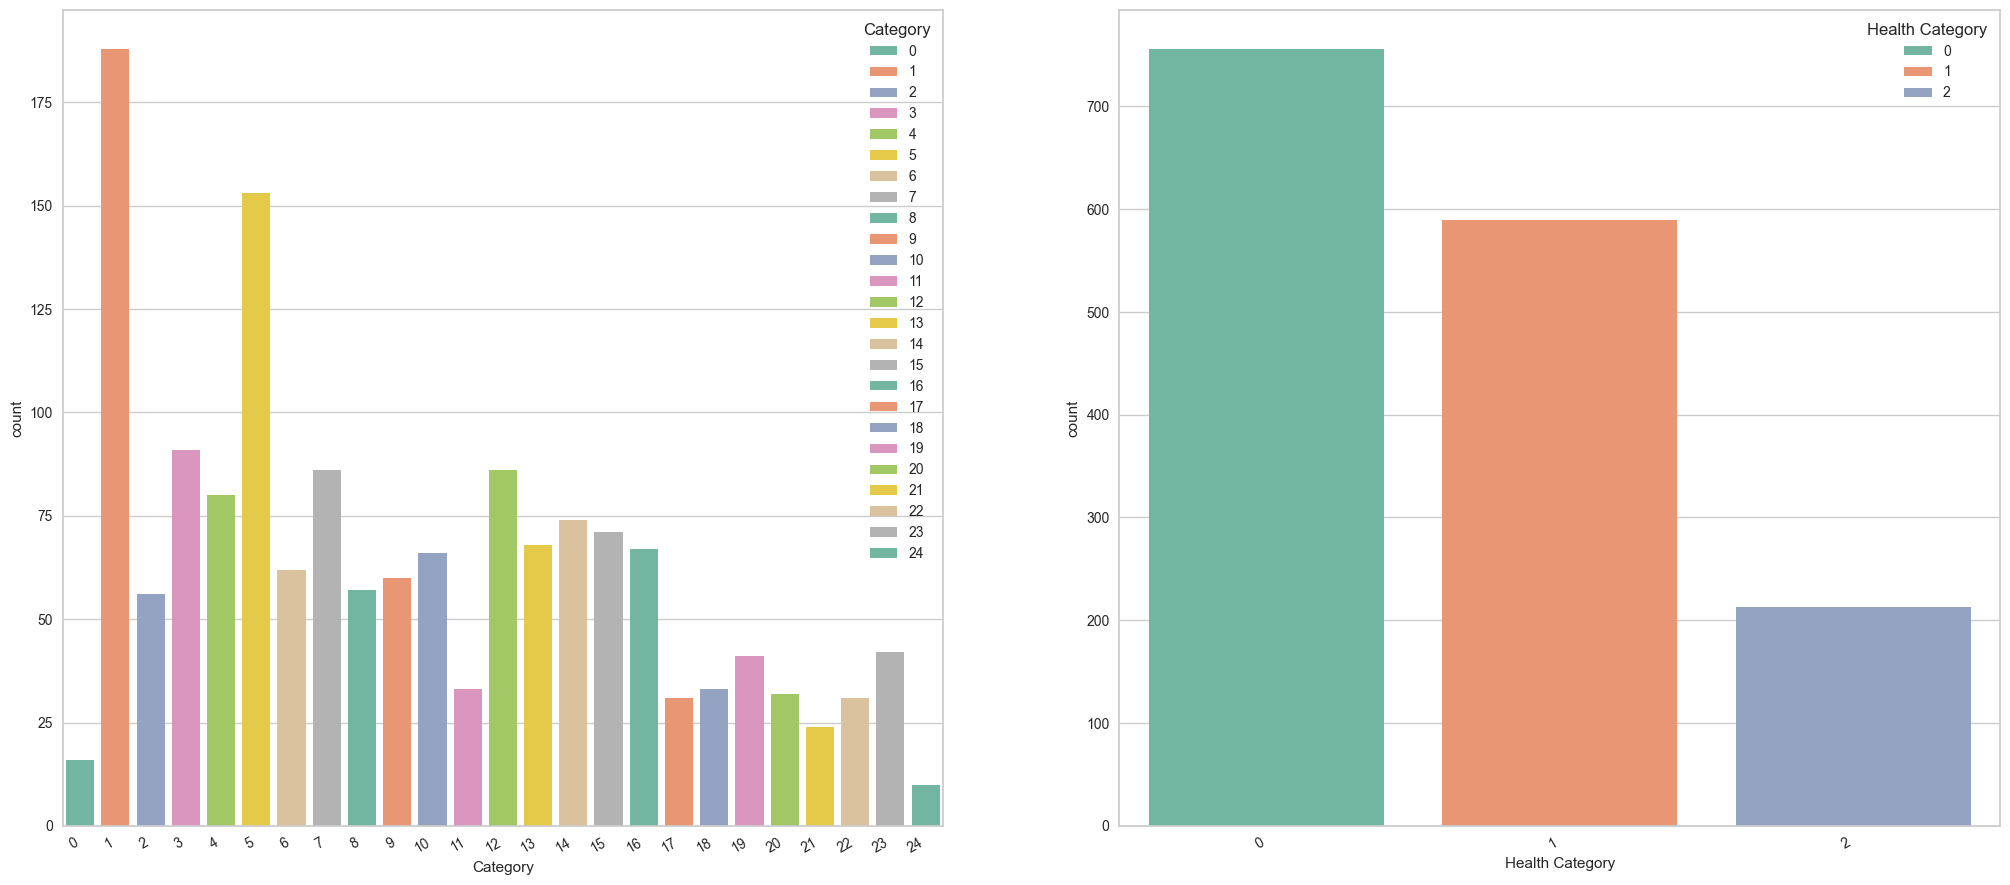

In [25]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=[25,12])
cols = ['Category','Health Category']
for i,j in zip(cols,ax.flatten()):
    if i!= 'Item':
        sns.countplot(data=df,x=df[i],hue=i,ax=j,palette='Set2')
        # plt.tight_layout()
fig.autofmt_xdate()
plt.show()

In [26]:
df.set_index(['FDC_ID','Item'],drop=True,inplace = True)

In [27]:
df.head()

,,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category
FDC_ID,Item,,,,,,,,,,,
171331,"Spices, poultry seasoning",0,307.0,9.59,65.59,7.53,0.0,5.0,9.31,0.0,7.5,0
172162,"Beef, plate steak, boneless, outside skirt, separable lean and fat, trimmed to 0"" fat, choice, raw",1,238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,0.0,0
172920,"Soup, tomato rice, canned, prepared with equal volume water",2,47.0,0.82,8.54,1.06,1.0,0.7,88.52,0.0,5.8,0
172659,"Lamb, Australian, imported, fresh, leg, bottom, boneless, separable lean and fat, trimmed to 1/8"" fat, raw",3,187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,0.0,1
167754,"Pummelo, raw",4,38.0,0.76,9.62,0.04,0.0,1.0,89.10,0.0,7.5,0


In [28]:
m = MinMaxScaler()
num.drop(columns = 'FDC_ID', inplace = True)

In [29]:
df[num.columns] = m.fit_transform(df[num.columns])

In [30]:
from sklearn.linear_model import LogisticRegressionCV

In [31]:
X = df.drop(columns = 'Health Category')
y = df['Health Category']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=10)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1246, 10), (1246,), (312, 10), (312,))

In [33]:
model1 = LogisticRegressionCV(cv=5)
model1.fit(X_train,y_train)

LogisticRegressionCV(cv=5)

In [34]:
pred = model1.predict(X_test)

In [35]:
accuracy_score(y_test,pred)

0.7403846153846154

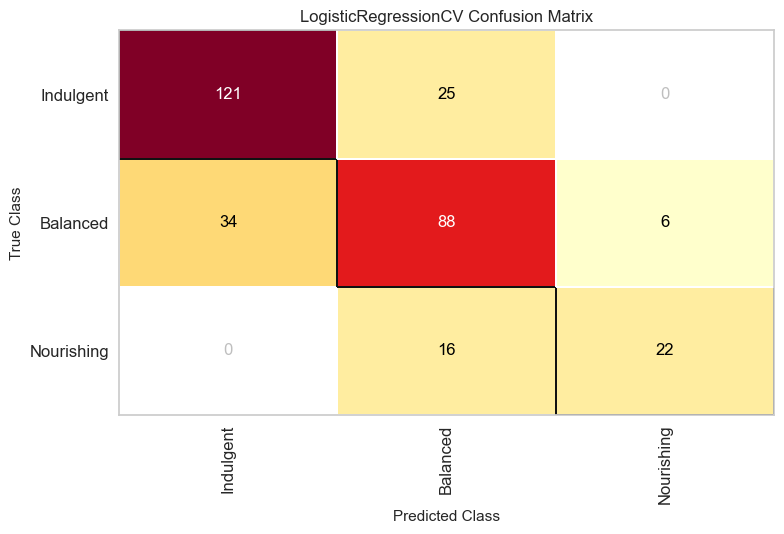

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [36]:
cm = ConfusionMatrix(model1, classes=['Indulgent','Balanced','Nourishing'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       146
           1       0.68      0.69      0.68       128
           2       0.79      0.58      0.67        38

    accuracy                           0.74       312
   macro avg       0.75      0.70      0.72       312
weighted avg       0.74      0.74      0.74       312



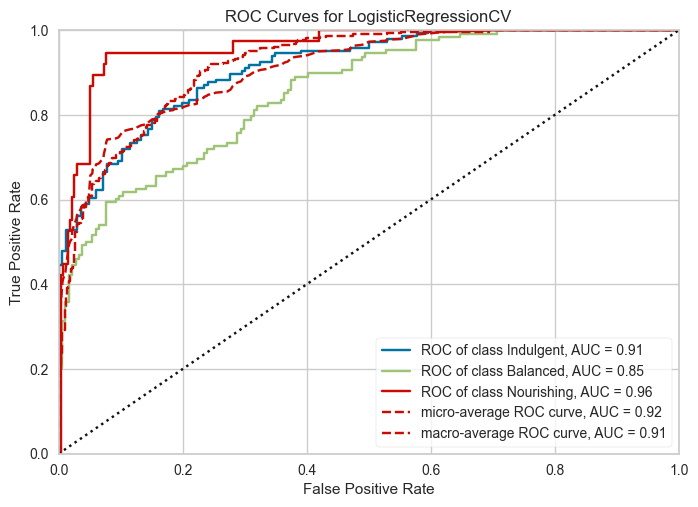

<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
visualizer = ROCAUC(model1, classes=['Indulgent','Balanced','Nourishing'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [39]:
ypred = model1.predict(X_test)
train_pred = model1.predict(X_train)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m1=pd.DataFrame({'Model':['Base Logistic Regressioin with CV'],
             'Misclassifications':FP+FN+cm[2,0]+cm[2,1]+cm[0,2]+cm[1,2],
             'precision validation': round(precision_score(y_test,ypred,average = 'weighted'),2),
             'recall validation':round(recall_score(y_test,ypred,average = 'weighted'),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy validation':round(accuracy_score(y_test,ypred),2),
             'f1 validation':round(f1_score(y_test,ypred,average = 'weighted'),2),
             'auc validation':round(visualizer.score_,4)
            })
m1


,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base Logistic Regressioin with CV,81,0.74,0.74,0.77,0.74,0.74,0.9099


In [40]:
d = DecisionTreeClassifier(random_state=10)
model2 = d.fit(X_train,y_train)

In [41]:
pred = model2.predict(X_test)

In [42]:
accuracy_score(y_test,pred)

0.9743589743589743

In [43]:
confusion_matrix(y_test,pred)

array([[141,   5,   0],
       [  2, 126,   0],
       [  0,   1,  37]], dtype=int64)

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       146
           1       0.95      0.98      0.97       128
           2       1.00      0.97      0.99        38

    accuracy                           0.97       312
   macro avg       0.98      0.97      0.98       312
weighted avg       0.97      0.97      0.97       312



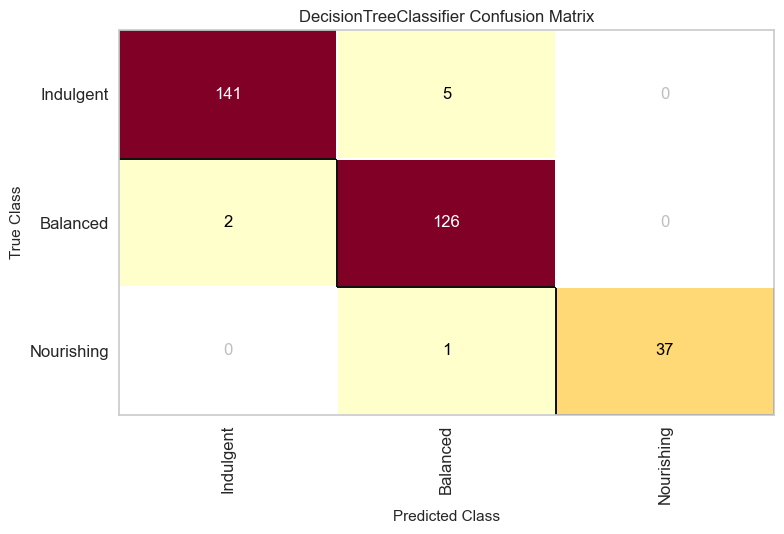

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
cm = ConfusionMatrix(model2, classes=['Indulgent','Balanced','Nourishing'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

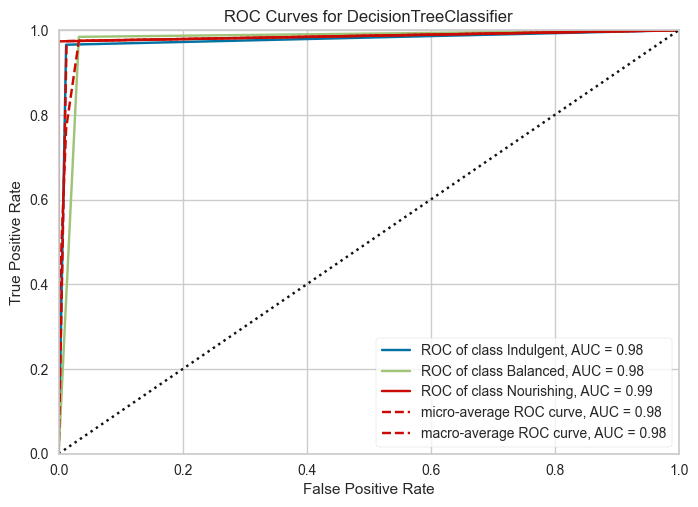

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
visualizer = ROCAUC(model2, classes=['Indulgent','Balanced','Nourishing'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [47]:
ypred = model2.predict(X_test)
train_pred = model2.predict(X_train)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m2=pd.DataFrame({'Model':['Base Decision Tree'],
             'Misclassifications':FP+FN+cm[2,0]+cm[2,1]+cm[0,2]+cm[1,2],
             'precision validation': round(precision_score(y_test,ypred,average = 'weighted'),2),
             'recall validation':round(recall_score(y_test,ypred,average = 'weighted'),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy validation':round(accuracy_score(y_test,ypred),2),
             'f1 validation':round(f1_score(y_test,ypred,average = 'weighted'),2),
             'auc validation':round(visualizer.score_,4)
            })
m2


,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base Decision Tree,8,0.97,0.97,1.0,0.97,0.97,0.9799


In [48]:
Results = pd.concat([m1,m2],ignore_index=True)
Results

,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base Logistic Regressioin with CV,81,0.74,0.74,0.77,0.74,0.74,0.9099
1,Base Decision Tree,8,0.97,0.97,1.00,0.97,0.97,0.9799


In [49]:
tuned_paramaters = {'max_depth':[i for i in range(1,8)],
                    'max_leaf_nodes':[i for i in range(1,25)],
                    'min_samples_leaf':[i for i in range(1,11)]
                    }

dc = DecisionTreeClassifier(random_state=10)

dc_grid = GridSearchCV(estimator = dc, 
                          param_grid = tuned_paramaters, 
                          cv = 5,
                          n_jobs=-1)


dc_grid.fit(X_train, y_train)

print('Best parameters for Decisiontree Classification: ', dc_grid.best_params_, '\n')

Best parameters for Decisiontree Classification:  {'max_depth': 7, 'max_leaf_nodes': 24, 'min_samples_leaf': 1} 



In [50]:
dc = DecisionTreeClassifier(max_depth= 7, max_leaf_nodes= 24, min_samples_leaf= 1,random_state=10)
model3 = dc.fit(X_train,y_train)

In [51]:
pred = model3.predict(X_test)

In [52]:
accuracy_score(y_test,pred)

0.967948717948718

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       146
           1       0.95      0.98      0.96       128
           2       1.00      0.97      0.99        38

    accuracy                           0.97       312
   macro avg       0.98      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312



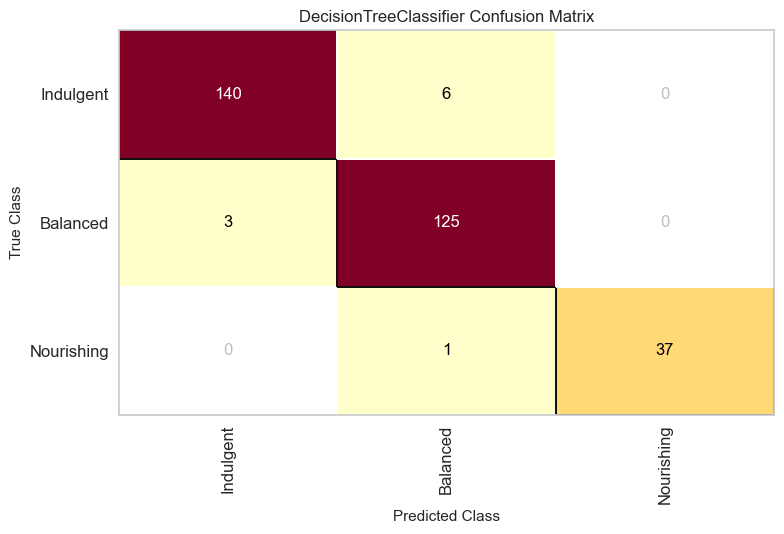

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
cm = ConfusionMatrix(model3, classes=['Indulgent','Balanced','Nourishing'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

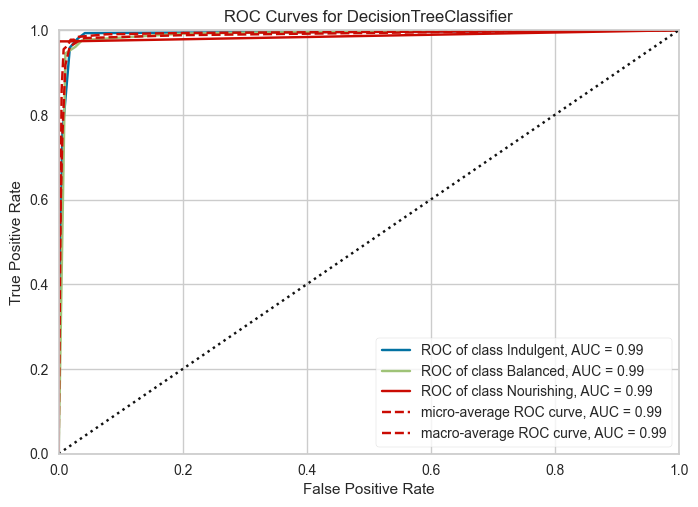

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
visualizer = ROCAUC(model3, classes=['Indulgent','Balanced','Nourishing'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [56]:
ypred = model3.predict(X_test)
train_pred = model3.predict(X_train)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m3=pd.DataFrame({'Model':['GridSearch Decision Tree'],
             'Misclassifications':FP+FN+cm[2,0]+cm[2,1]+cm[0,2]+cm[1,2],
             'precision validation': round(precision_score(y_test,ypred,average = 'weighted'),2),
             'recall validation':round(recall_score(y_test,ypred,average = 'weighted'),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy validation':round(accuracy_score(y_test,ypred),2),
             'f1 validation':round(f1_score(y_test,ypred,average = 'weighted'),2),
             'auc validation':round(visualizer.score_,4)
            })
m3


,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,GridSearch Decision Tree,10,0.97,0.97,0.98,0.97,0.97,0.9889


In [57]:
Results = pd.concat([Results,m3],ignore_index=True)
Results

,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base Logistic Regressioin with CV,81,0.74,0.74,0.77,0.74,0.74,0.9099
1,Base Decision Tree,8,0.97,0.97,1.00,0.97,0.97,0.9799
2,GridSearch Decision Tree,10,0.97,0.97,0.98,0.97,0.97,0.9889


In [58]:
r = RandomForestClassifier(random_state=10)
model4 = r.fit(X_train,y_train)

In [59]:
pred = model4.predict(X_test)
accuracy_score(y_test,pred)

0.9839743589743589

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       146
           1       0.97      0.99      0.98       128
           2       1.00      0.95      0.97        38

    accuracy                           0.98       312
   macro avg       0.99      0.98      0.98       312
weighted avg       0.98      0.98      0.98       312



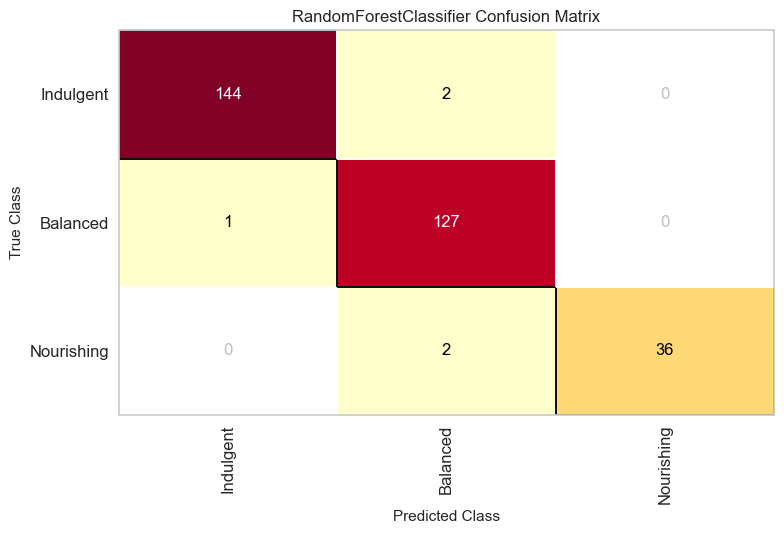

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
cm = ConfusionMatrix(model4, classes=['Indulgent','Balanced','Nourishing'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

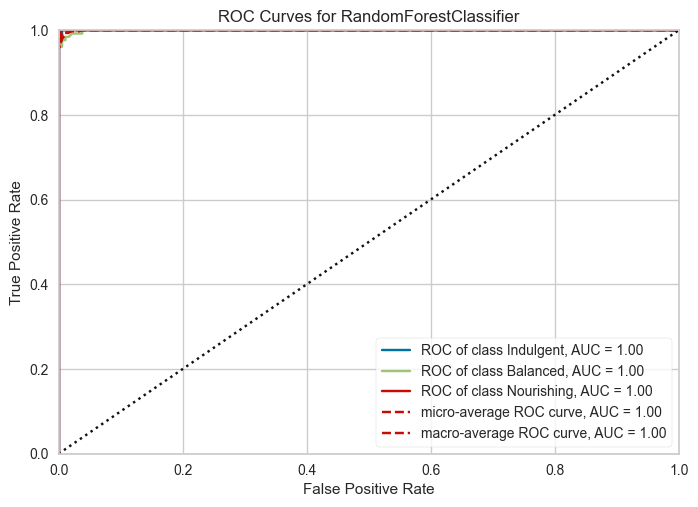

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
visualizer = ROCAUC(model4, classes=['Indulgent','Balanced','Nourishing'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [63]:
ypred = model4.predict(X_test)
train_pred = model4.predict(X_train)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m4=pd.DataFrame({'Model':['Base RandomForest CLassifier'],
             'Misclassifications':FP+FN+cm[2,0]+cm[2,1]+cm[0,2]+cm[1,2],
             'precision validation': round(precision_score(y_test,ypred,average = 'weighted'),2),
             'recall validation':round(recall_score(y_test,ypred,average = 'weighted'),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy validation':round(accuracy_score(y_test,ypred),2),
             'f1 validation':round(f1_score(y_test,ypred,average = 'weighted'),2),
             'auc validation':round(visualizer.score_,4)
            })
m4

,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base RandomForest CLassifier,5,0.98,0.98,1.0,0.98,0.98,0.9998


In [64]:
Results = pd.concat([Results,m4],ignore_index=True)
Results

,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base Logistic Regressioin with CV,81,0.74,0.74,0.77,0.74,0.74,0.9099
1,Base Decision Tree,8,0.97,0.97,1.00,0.97,0.97,0.9799
2,GridSearch Decision Tree,10,0.97,0.97,0.98,0.97,0.97,0.9889
3,Base RandomForest CLassifier,5,0.98,0.98,1.00,0.98,0.98,0.9998


tuned_paramaters = {'n_estimators':[i for i in range(100,500,50)],
                   'max_depth':[i for i in range(1,8)],
                    'max_leaf_nodes':[i for i in range(1,25)],
                    'min_samples_leaf':[i for i in range(1,11)]}

rf = RandomForestClassifier(random_state=10)

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = tuned_paramaters, 
                       cv = 5,
                       n_jobs=-1)


rf_grid.fit(X_train, y_train)

print('Best parameters for RandomForest Classifier ', rf_grid.best_params_, '\n')

In [65]:
model5 = GradientBoostingClassifier(random_state=10)
model5.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10)

In [66]:
pred = model5.predict(X_test)
accuracy_score(y_test,pred)

0.9935897435897436

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       146
           1       0.99      0.99      0.99       128
           2       1.00      1.00      1.00        38

    accuracy                           0.99       312
   macro avg       1.00      1.00      1.00       312
weighted avg       0.99      0.99      0.99       312



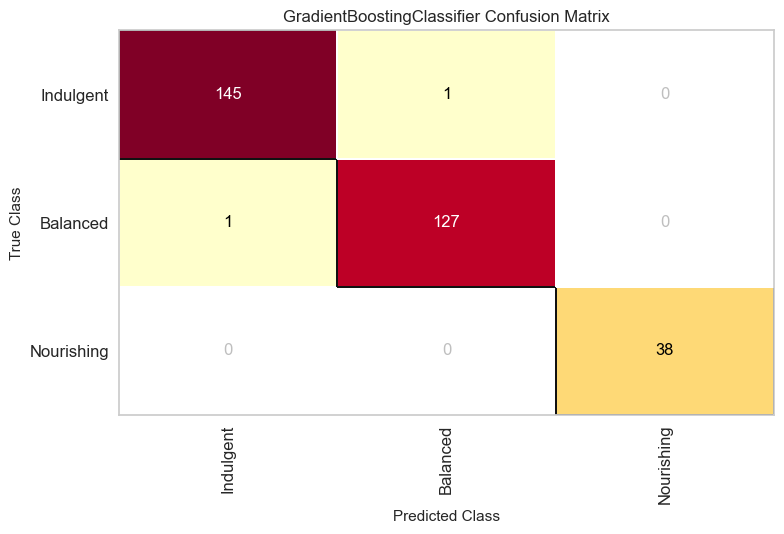

<Axes: title={'center': 'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
cm = ConfusionMatrix(model5, classes=['Indulgent','Balanced','Nourishing'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

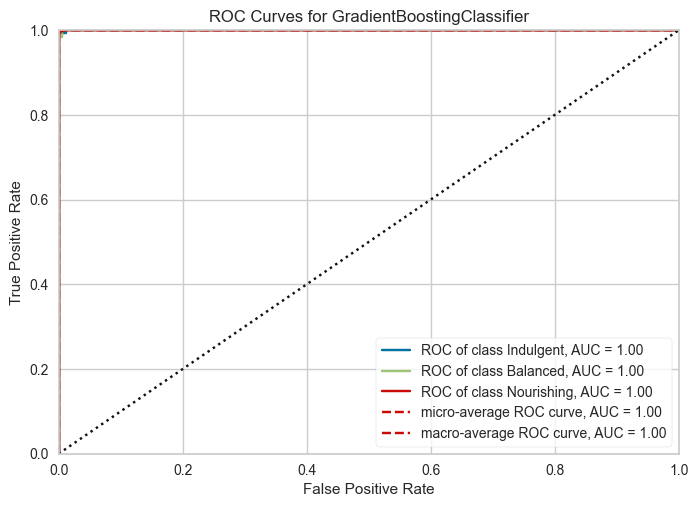

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [69]:
visualizer = ROCAUC(model5, classes=['Indulgent','Balanced','Nourishing'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [70]:
ypred = model5.predict(X_test)
train_pred = model5.predict(X_train)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m5=pd.DataFrame({'Model':['Base Gradient Boosting'],
             'Misclassifications':FP+FN+cm[2,0]+cm[2,1]+cm[0,2]+cm[1,2],
             'precision validation': round(precision_score(y_test,ypred,average = 'weighted'),2),
             'recall validation':round(recall_score(y_test,ypred,average = 'weighted'),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy validation':round(accuracy_score(y_test,ypred),2),
             'f1 validation':round(f1_score(y_test,ypred,average = 'weighted'),2),
             'auc validation':round(visualizer.score_,4)
            })
m5

,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base Gradient Boosting,2,0.99,0.99,1.0,0.99,0.99,1.0


In [71]:
Results = pd.concat([Results,m5],ignore_index=True)
Results

,Model,Misclassifications,precision validation,recall validation,accuracy train,accuracy validation,f1 validation,auc validation
0,Base Logistic Regressioin with CV,81,0.74,0.74,0.77,0.74,0.74,0.9099
1,Base Decision Tree,8,0.97,0.97,1.00,0.97,0.97,0.9799
2,GridSearch Decision Tree,10,0.97,0.97,0.98,0.97,0.97,0.9889
3,Base RandomForest CLassifier,5,0.98,0.98,1.00,0.98,0.98,0.9998
4,Base Gradient Boosting,2,0.99,0.99,1.00,0.99,0.99,1.0000


In [72]:
test = pd.read_csv('test_dataframe.csv')

In [73]:
test.describe()

,FDC_ID,Calories,Protein,Carbohydrate,Total fat,Fiber
count,6235.000000,6235.000000,6235.000000,6235.000000,6235.000000,5783.000000
mean,171411.235445,220.168503,11.920143,19.655609,10.630981,1.968096
std,2258.478983,168.236994,10.880956,25.813529,16.326869,4.322535
min,167512.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169442.500000,92.000000,2.300000,0.000000,0.805000,0.000000
50%,171417.000000,184.000000,8.920000,7.600000,5.060000,0.300000
75%,173358.500000,316.000000,20.900000,27.410000,13.395000,2.300000
max,175304.000000,902.000000,88.320000,100.000000,100.000000,79.000000


In [74]:
cols = ['Cholesterol','Water','Alcohol','Vitamin C']
for i in cols:
    l=[]
    for j in range(len(test)):
        if type(test[i].iloc[j]) != type(0.0):
            l += [float(test[i].iloc[j].split(' ')[0])]
        else:
            l += [test[i].iloc[j]]
    test[i]=l

In [75]:
test.head(2)

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,169340,"Carrots, canned, no salt added, solids and liq...",Vegetables and Vegetable Products,23.0,0.59,5.36,0.14,0.0,1.8,92.99,0.0,2.0
1,169408,"Nuts, chestnuts, japanese, dried",Nut and Seed Products,360.0,5.25,81.43,1.24,0.0,NaN,9.96,NaN,61.3


In [76]:
test.set_index(['FDC_ID','Item'],inplace = True)

In [77]:
num = test.select_dtypes('number')
test[num.columns] = m.transform(test[num.columns])
test['Category'] = oe2.transform(test[['Category']]).astype(int)

In [78]:
test.head(2)

,,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
FDC_ID,Item,,,,,,,,,,
169340,"Carrots, canned, no salt added, solids and liquids",5,0.034580,0.012301,0.080693,0.004150,0.0,0.36,0.9299,0.0,0.266667
169408,"Nuts, chestnuts, japanese, dried",18,0.541252,0.109458,1.225894,0.036761,0.0,NaN,0.0996,NaN,8.173333


In [79]:
test.isnull().sum()

Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      331
Fiber            452
Water              0
Alcohol         1927
Vitamin C        383
dtype: int64

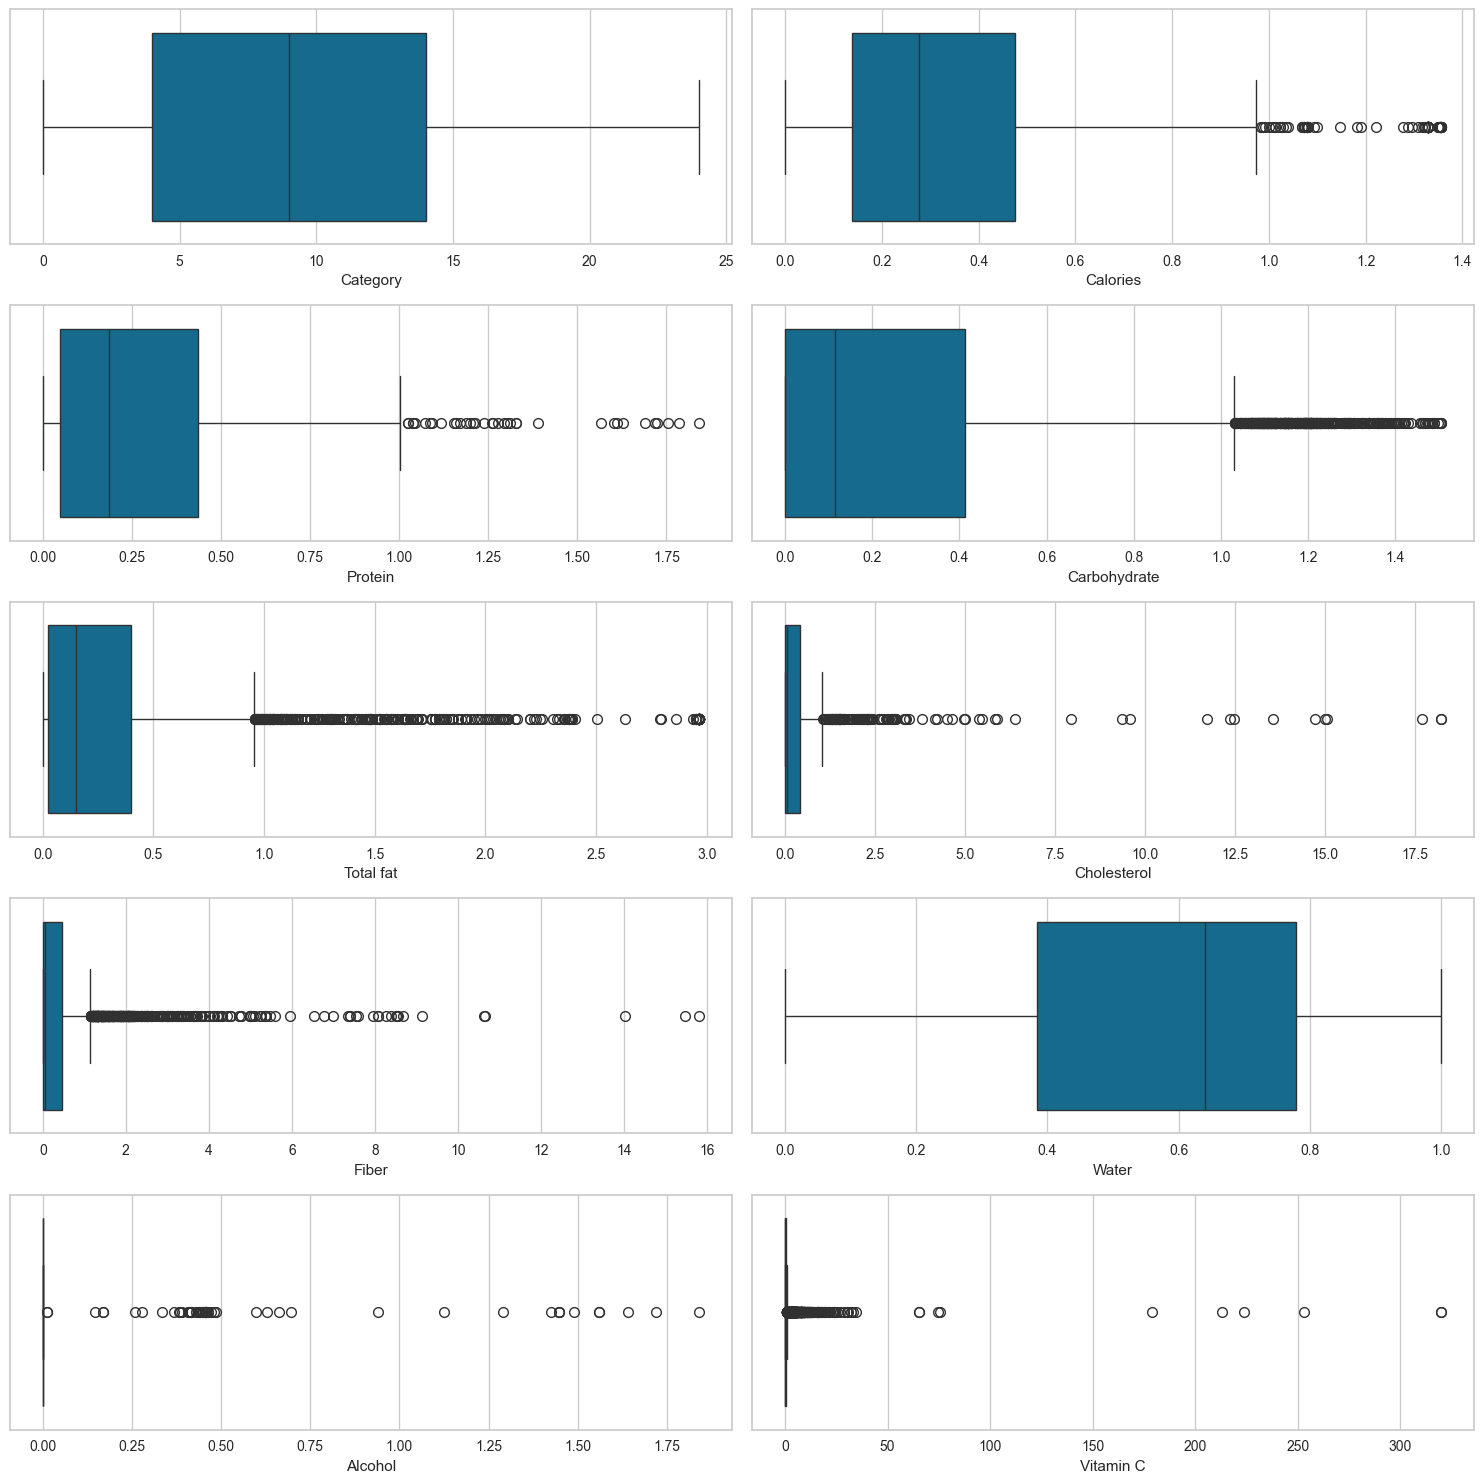

In [80]:
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=[15,15])
for i,j in zip(test.select_dtypes(np.number).columns,ax.flatten()):
    sns.boxplot(x=test[i],ax=j)
    plt.tight_layout()
    # fig.autofmt_xdate()

plt.show()

In [81]:
cols = ['Alcohol','Fiber','Vitamin C','Cholesterol']
for i in cols:
    test[i].fillna(test[i].median(),inplace=True)
# test[cols] = imputer.transform(test[cols])

In [82]:
num = df.select_dtypes(include=np.number)
for i in num.columns:
    if i!= 'Alcohol':
        outliers(df,i)

In [83]:
models = [model1,model2,model3,model4,model5]
names = ['Base Logistic','Base Decision','Grid Decision','Base Randomforest','Base Gradient Boosting']
for model,name in zip(models,names):
    pred = model.predict(test)
    t = pd.DataFrame({'Health Category':pred})
    t.replace({0:'Indulgent',1:'Balanced',2:'Nourishing'},inplace=True)
    t.to_csv(name+'2.csv')


In [84]:
# import pickle
# models = [model1,model2,model3,model4,model5]
# names = ['Base Logistic','Base Decision','Grid Decision','Base Randomforest','Base Gradient Boosting']
# for model,name in zip(models,names):
#     with open(name+".pickle", "wb") as f:
#         pickle.dump(model, f)